# Telecom Customer churn Prediction

## Import libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Load The Dataset

In [10]:
tele_cust = pd.read_csv(r"C:\Aditya\Telco_Customer_Churn.csv")

## Data Preprocessing and EDA

In [13]:
tele_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
tele_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
tele_cust.describe() #numerical data by describe

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [21]:
tele_cust.describe(include='all')  # include'all' shows catogerical data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## Convering Total Charges to a numerical data type

In [24]:
tele_cust["TotalCharges"] = pd.to_numeric(tele_cust["TotalCharges"], errors="coerce") # coerce makes non numberic values null or it shows error

In [26]:
tele_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
tele_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [32]:
11/7043

0.001561834445548772

In [34]:
# Remove missing value
tele_cust.dropna(inplace = True)

In [36]:
tele_cust.shape

(7032, 21)

## EDA

In [45]:
df2 = tele_cust.iloc[ :, 1: ]  # iloc = index locking

In [47]:
df2.shape

(7032, 20)

In [49]:
## Convert churn column into numerical (yes, no  to 0 & 1)
df2["Churn"].replace(to_replace="Yes", value=1, inplace= True)
df2["Churn"].replace(to_replace="No", value=0, inplace= True)

In [53]:
df2.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0


## Relationship of Churn column with other columns

In [56]:
# get_dummies makes dummy variable into columns 
df_dummies = pd.get_dummies(df2)
df_dummies.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False


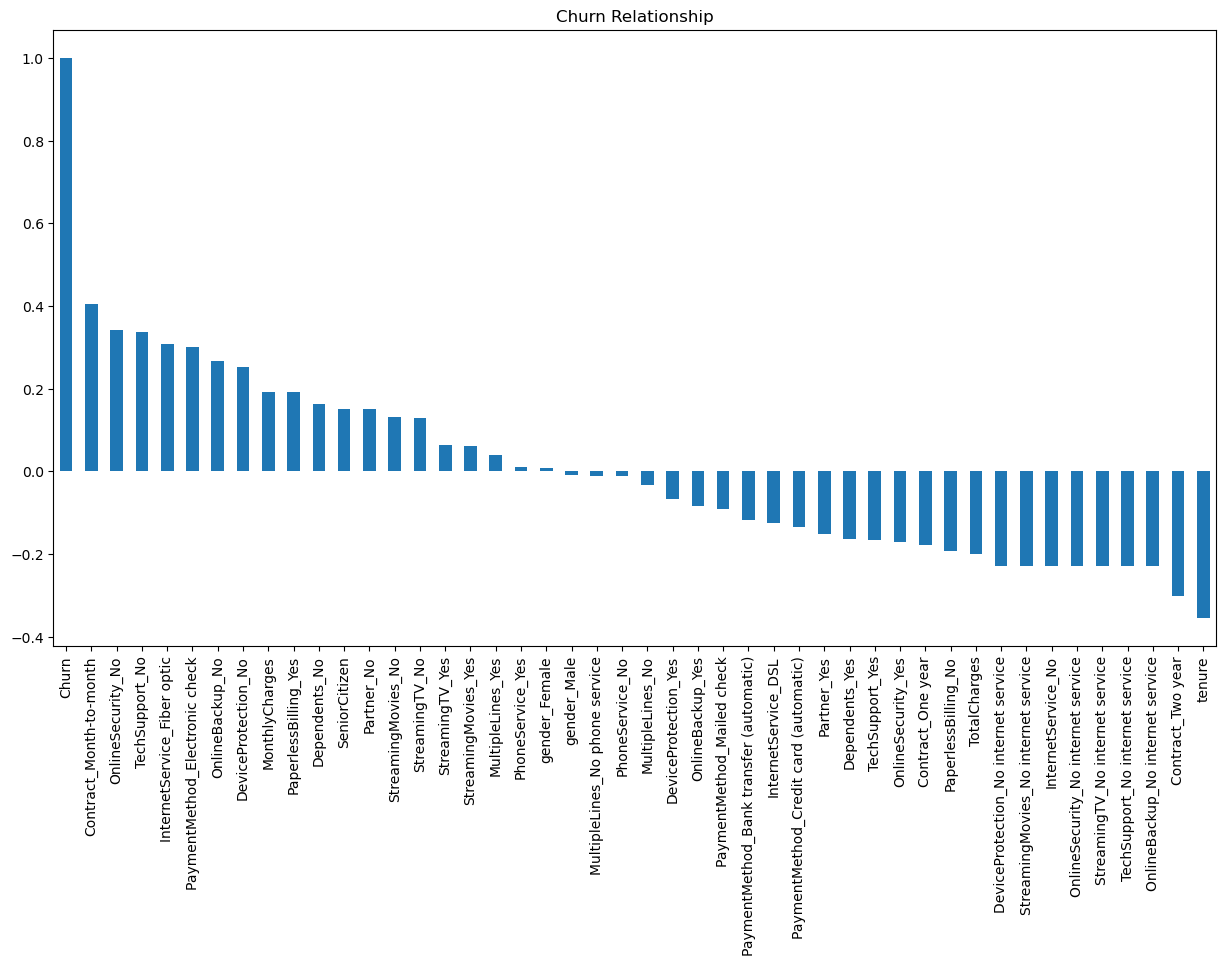

In [62]:
plt.figure(figsize=(15,8))
df_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.title("Churn Relationship")
plt.show()

Interpretation:
<br> Month to Month contracts, No online security and No Techsupport seem to be positively co-relatied with churn.
<br> Tenure, Two year contraft have negative co-relations.
Services like Device protection, internet serivce, Streaming services, online security, techsupport, online backup also  have negative correlation

## Data Exploration

### A. Demographic data
* Gender
* Age
* Partner
* Dependent Status

1. Gender Distribution

In [75]:
import matplotlib.ticker as mtick

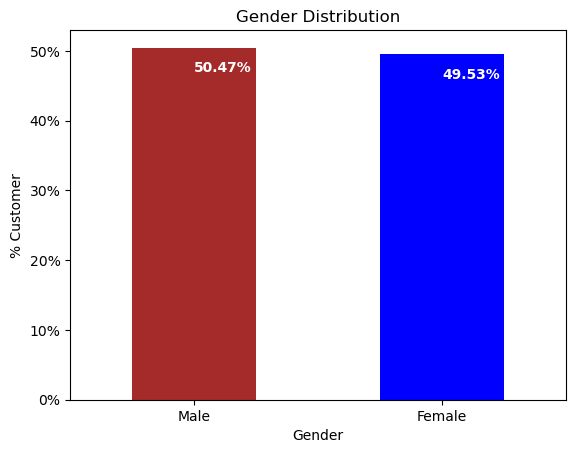

In [83]:
colors = ["brown", "blue"]
gender_counts = tele_cust["gender"].value_counts()

ax = (gender_counts * 100.0 / len(tele_cust)).plot(
    kind="bar",
    stacked=True,
    rot=0,
    color=colors
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("% Customer")
ax.set_xlabel("Gender")
ax.set_title("Gender Distribution")

# Iterate the bar height and add label to the bars
total = gender_counts.sum()
for bar, count in zip(ax.patches, gender_counts):
    percentage = count/total * 100
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 3.5,
            f'{percentage:.2f}%',
            fontsize=10,
            color='white',
            weight="bold"
            
    )

plt.show()

There are equal number of Male and Female Customers

2. Senior Citizen %

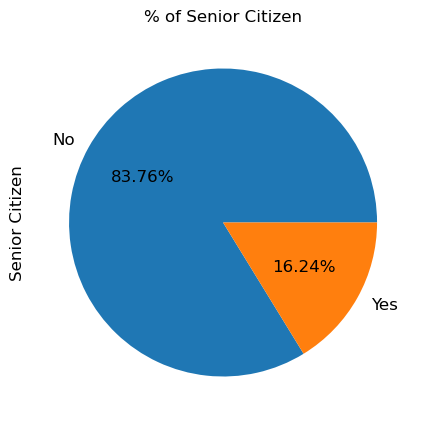

In [103]:
ax = ( tele_cust["SeniorCitizen"].value_counts() * 100 / len(tele_cust))\
.plot.pie(autopct="%.2f%%", labels=["No", "Yes"], figsize=(5,5), fontsize= 12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Senior Citizen", fontsize=12)
ax.set_title("% of Senior Citizen")

plt.show()

Senior Citizen are 16%

3. Partner and dependent status

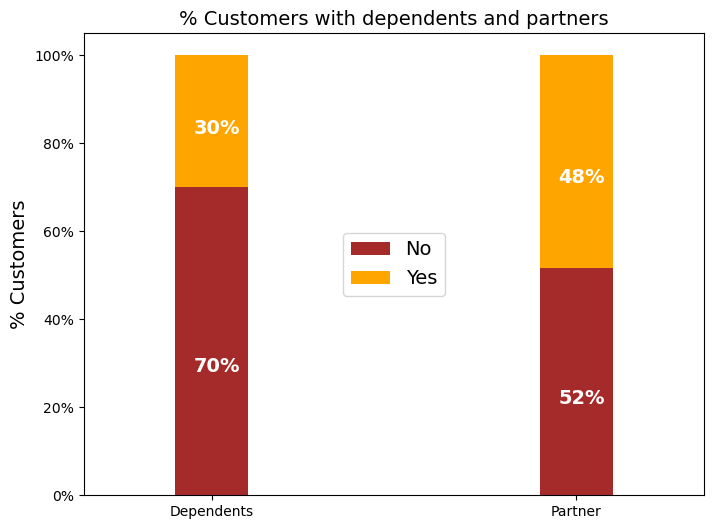

In [107]:
df2 = pd.melt(tele_cust, id_vars=['customerID'], value_vars=['Dependents','Partner']) # melt conbines 2 columns with the main columns eg.(custId&Dept, custId&Part.)
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(tele_cust)
colors = ['brown','orange']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

## B. Customer Account Information

* Tenure & contract

1. Tenure

In [113]:
import seaborn as sns

Text(0.5, 1.0, 'No of Customers by their tenure')

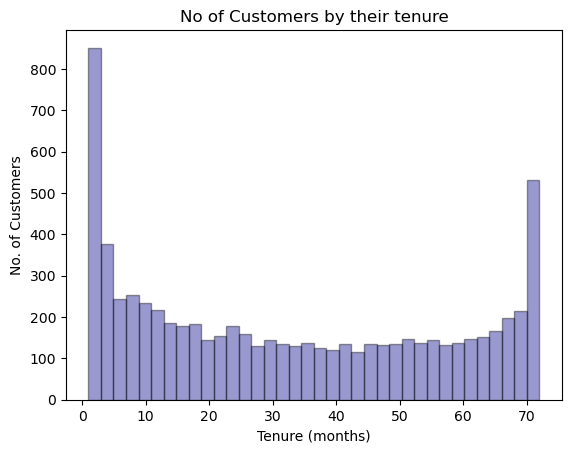

In [117]:
ax = sns.distplot(tele_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('No of Customers by their tenure')

# Predictive Modeling - ML Algorithms
* Logistic Regression
* Random Forest
* SVM
* ADA Boost
* XG Boost

In [122]:
## We will defing X and y

In [124]:
X = tele_cust.drop(columns=["Churn"])
y = tele_cust["Churn"]

In [126]:
X.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [130]:
X.drop(columns = "customerID", inplace= True)

In [132]:
X.shape

(7032, 19)

In [134]:
X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## Feature Scaling

In [139]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler = MinMaxScaler(feature_range=(0,1))
features = X_dummy.columns.values

scaler.fit(X_dummy)
X = pd.DataFrame(scaler.transform(X_dummy))
X.columns = features

In [145]:
X.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Divide the data into Train and test data

In [150]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [154]:
X_train.shape, y_train.shape

((5625, 30), (5625,))

In [156]:
X_test.shape, y_test.shape

((1407, 30), (1407,))

## 1. Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression

In [163]:
model = LogisticRegression()
model.fit(X_train, y_train) # model Training

LogisticRegression()

In [167]:
# Predict the model
y_pred = model.predict(X_test)

#### Model Evaluation

In [170]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [172]:
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression:  0.7882018479033405


In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1033
         Yes       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [176]:
# To identify feature importance
weights = pd.Series(model.coef_[0],
                    index = X.columns.values)

Axes(0.125,0.11;0.775x0.77)


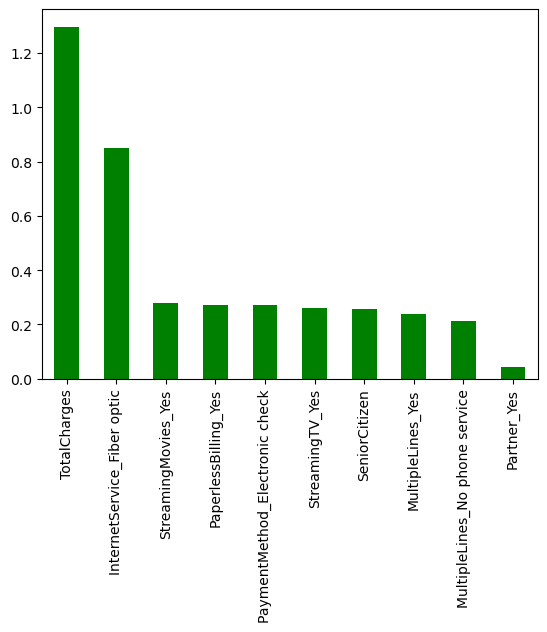

In [178]:
print(weights.sort_values(ascending=False)[:10].plot(kind="bar", color="green"))

Axes(0.125,0.11;0.775x0.77)


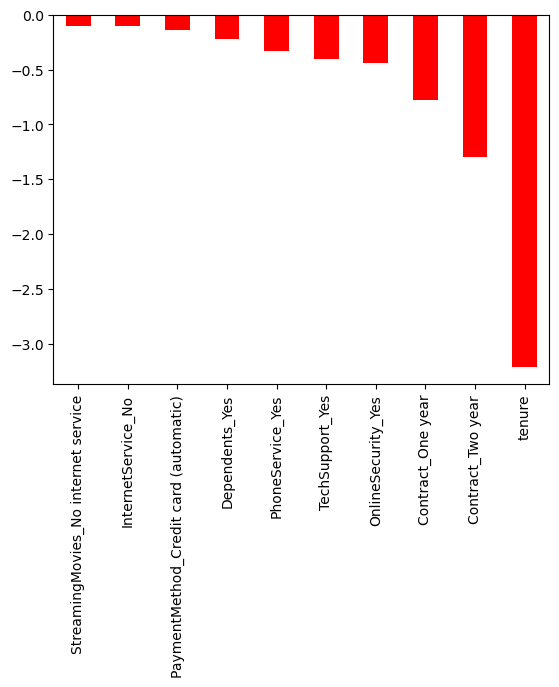

In [182]:
print(weights.sort_values(ascending=False)[-10:].plot(kind="bar", color="red")) # we can drop the negative value columns to imporve accuracy

## 2. Random Forest 

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, max_leaf_nodes=30, random_state=50)
# train
model.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [211]:
# Prediction
y_pred = model.predict(X_test)

### Model Evaluation

In [213]:
print("Accuracy score of Random Forest: ", accuracy_score(y_test,y_pred))

Accuracy score of Random Forest:  0.7917555081734187


In [214]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1033
         Yes       0.66      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



### Feature Importance

In [222]:
features = model.feature_importances_
weights = pd.Series(features,
                    index = X.columns.values)

Axes(0.125,0.11;0.775x0.77)


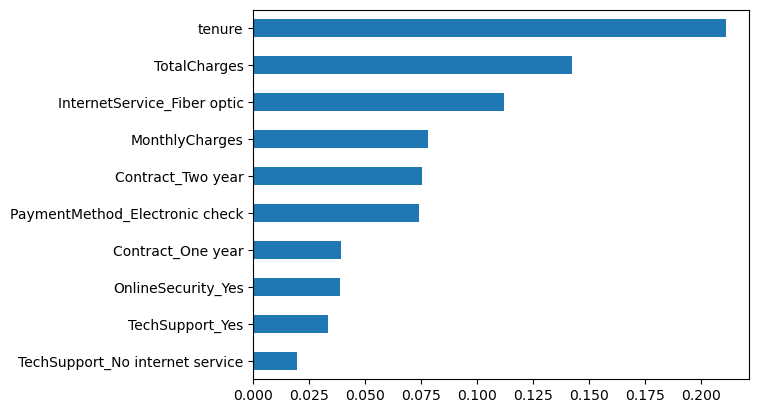

In [224]:
print(weights.sort_values()[-10:].plot(kind="barh"))

## 3. SVM

In [229]:
from sklearn.svm import SVC

In [231]:
model = SVC(kernel = "rbf")
model.fit(X_train, y_train) # train

SVC()

In [233]:
# Prediction
y_pred = model.predict(X_test)

### Model Evaluation

In [238]:
print("Accuracy Score of SVM is: ", accuracy_score(y_test,y_pred))

Accuracy Score of SVM is:  0.7839374555792467


In [242]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1033
         Yes       0.62      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



## 4. ADA Boost

In [245]:
from sklearn.ensemble import AdaBoostClassifier  # Adaptive Boosting

In [247]:
model = AdaBoostClassifier(n_estimators=50)
# Train the model
model.fit(X_train, y_train)

AdaBoostClassifier()

In [249]:
# Predict the result
y_pred = model.predict(X_test)

#### Model Evaluation

In [254]:
print("Accuracy Score of AdaBoost: ", accuracy_score(y_test,y_pred))

Accuracy Score of AdaBoost:  0.7938877043354655


In [258]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1033
         Yes       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



## 5. XG Boost

In [261]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 2.6 MB/s eta 0:00:59
   ---------------------------------------- 1.3/150.0 MB 2.5 MB/s eta 0:01:00
   ---------------------------------------- 1.8/150.0 MB 2.5 MB/s eta 0:01:01
    --------------------------------------- 2.1/150.0 MB 2.3 MB/s eta 0:01:04
    --------------------------------------- 2.6/150.0 MB 2.3 MB/s eta 0:01:04
    --------------------------------------- 3.1/150.0 MB 2.4 MB/s eta 0:01:03
    --------------------------------------- 3.7/150.0 MB 2.4 MB/s eta 0:01:02
   - -------------------------------------- 4.2/150.0 MB 2.4 MB/s eta 0:01:02
   - -------------------------------------- 4.7/150.0 MB 2.4 MB/s eta 0:01:02
   - -------------------------------------- 5.0/150.0 MB 2.3 MB/s eta 0:01:02
   - -------------------------------------- 5.5/150.0 MB 2.3 MB/s eta 0:01:04



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [263]:
from xgboost import XGBClassifier

In [265]:
y_train.replace("Yes", 1, inplace= True)
y_train.replace("No", 0, inplace=True)

In [267]:
y_test.replace("Yes", 1, inplace= True)
y_test.replace("No", 0, inplace=True)

In [271]:
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [273]:
# Prediction
y_pred = model.predict(X_test)

In [275]:
print("Accuracy of XG Boost: ",  accuracy_score(y_test,y_pred))

Accuracy of XG Boost:  0.7739872068230277


In [277]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407

